# Importing nessesasry libraries

In [1]:
import numpy as np
import pandas as pd
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

# data directory and overview

In [2]:
print(f"folders: {os.listdir('/kaggle/input/h-and-m-personalized-fashion-recommendations/')}")
print("subfolders: ", len(list(os.listdir("/kaggle/input/h-and-m-personalized-fashion-recommendations/images"))))

folders: ['sample_submission.csv', 'articles.csv', 'transactions_train.csv', 'images', 'customers.csv']
subfolders:  86


In [3]:
total_folders = total_files = 0
folder_info = []
images_names = []
for base, dirs, files in tqdm(os.walk('/kaggle/input/h-and-m-personalized-fashion-recommendations/')):
    for directories in dirs:
        folder_info.append((directories, len(os.listdir(os.path.join(base, directories)))))
        total_folders += 1
    for _files in files:
        total_files += 1
        if len(_files.split(".jpg"))==2:
            images_names.append(_files.split(".jpg")[0])

88it [00:30,  2.91it/s]


In [4]:
print(f"Total number of folders: {total_folders}\nTotal number of files: {total_files}")
folder_info_df = pd.DataFrame(folder_info, columns=["folder", "files count"])
folder_info_df.sort_values(["files count"], ascending=False).head()

Total number of folders: 87
Total number of files: 105104


,folder,files count
71,069,4187
45,073,3438
31,062,3361
36,068,3313
26,070,3309


In [5]:
print("folder names: ", list(folder_info_df.folder.unique()))

folder names:  ['images', '057', '086', '061', '048', '053', '051', '095', '018', '044', '016', '012', '029', '025', '078', '056', '042', '082', '055', '076', '091', '094', '027', '080', '041', '036', '070', '071', '035', '026', '065', '062', '084', '034', '058', '060', '068', '075', '033', '049', '023', '020', '013', '050', '052', '073', '066', '067', '022', '043', '054', '081', '047', '011', '087', '072', '021', '015', '059', '014', '039', '040', '090', '064', '063', '031', '092', '017', '083', '019', '024', '069', '093', '089', '037', '046', '045', '010', '088', '077', '028', '038', '074', '079', '032', '030', '085']


# Checking the available files format

In [6]:
articles_df = pd.read_csv("/kaggle/input/h-and-m-personalized-fashion-recommendations/articles.csv")
customers_df = pd.read_csv("/kaggle/input/h-and-m-personalized-fashion-recommendations/customers.csv")
sample_submission_df = pd.read_csv("/kaggle/input/h-and-m-personalized-fashion-recommendations/sample_submission.csv")

In [7]:
transactions_train_df = pd.read_csv("/kaggle/input/h-and-m-personalized-fashion-recommendations/transactions_train.csv")

In [8]:
articles_df.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [9]:
customers_df.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [10]:
sample_submission_df.head()

,customer_id,prediction
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0706016001 0706016002 0372860001 0610776002 07...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0706016001 0706016002 0372860001 0610776002 07...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0706016001 0706016002 0372860001 0610776002 07...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0706016001 0706016002 0372860001 0610776002 07...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,0706016001 0706016002 0372860001 0610776002 07...


In [11]:
transactions_train_df.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [12]:
articles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   article_id                    105542 non-null  int64 
 1   product_code                  105542 non-null  int64 
 2   prod_name                     105542 non-null  object
 3   product_type_no               105542 non-null  int64 
 4   product_type_name             105542 non-null  object
 5   product_group_name            105542 non-null  object
 6   graphical_appearance_no       105542 non-null  int64 
 7   graphical_appearance_name     105542 non-null  object
 8   colour_group_code             105542 non-null  int64 
 9   colour_group_name             105542 non-null  object
 10  perceived_colour_value_id     105542 non-null  int64 
 11  perceived_colour_value_name   105542 non-null  object
 12  perceived_colour_master_id    105542 non-null  int64 
 13 

In [13]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371980 entries, 0 to 1371979
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1371980 non-null  object 
 1   FN                      476930 non-null   float64
 2   Active                  464404 non-null   float64
 3   club_member_status      1365918 non-null  object 
 4   fashion_news_frequency  1355971 non-null  object 
 5   age                     1356119 non-null  float64
 6   postal_code             1371980 non-null  object 
dtypes: float64(3), object(4)
memory usage: 73.3+ MB


In [14]:
sample_submission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371980 entries, 0 to 1371979
Data columns (total 2 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   customer_id  1371980 non-null  object
 1   prediction   1371980 non-null  object
dtypes: object(2)
memory usage: 20.9+ MB


In [15]:
transactions_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31788324 entries, 0 to 31788323
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   t_dat             object 
 1   customer_id       object 
 2   article_id        int64  
 3   price             float64
 4   sales_channel_id  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.2+ GB


# EDA

There are 3 main tables:
- articles - contains informations about each article (like product code, name, product group code, name ...)    
- customers - contains informations about each customer (fidelity card membership, age, postal code)
- transactions (train)  

Transactions have `customer_id` and `article_id`, which are foreign keys for the customer and articles tables.
Beside this, transaction also contains `sales_channel_id`.


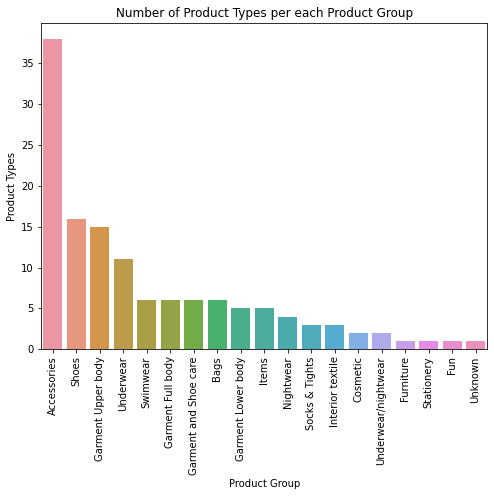

In [16]:
temp = articles_df.groupby(["product_group_name"])["product_type_name"].nunique()
df = pd.DataFrame({'Product Group': temp.index,
                   'Product Types': temp.values
                  })
df = df.sort_values(['Product Types'], ascending=False)
plt.figure(figsize = (8,6))
plt.title('Number of Product Types per each Product Group')
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Product Group', y="Product Types", data=df)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

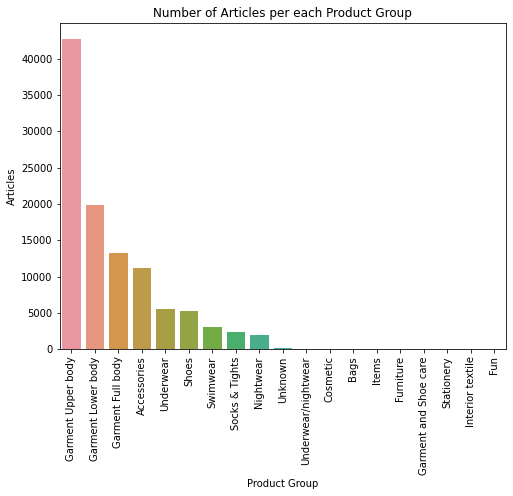

In [17]:
temp = articles_df.groupby(["product_group_name"])["article_id"].nunique()
df = pd.DataFrame({'Product Group': temp.index,
                   'Articles': temp.values
                  })
df = df.sort_values(['Articles'], ascending=False)
plt.figure(figsize = (8,6))
plt.title('Number of Articles per each Product Group')
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Product Group', y="Articles", data=df)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

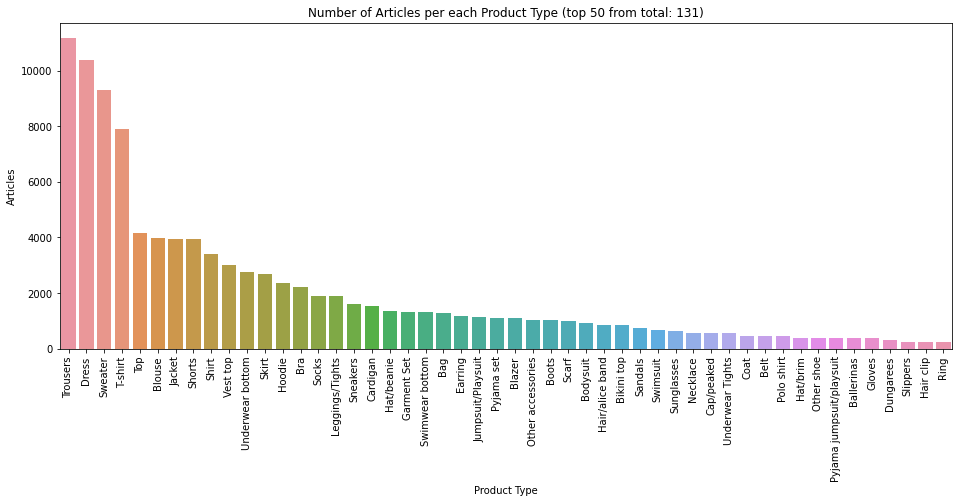

In [18]:
temp = articles_df.groupby(["product_type_name"])["article_id"].nunique()
df = pd.DataFrame({'Product Type': temp.index,
                   'Articles': temp.values
                  })
total_types = len(df['Product Type'].unique())
df = df.sort_values(['Articles'], ascending=False)[0:50]
plt.figure(figsize = (16,6))
plt.title(f'Number of Articles per each Product Type (top 50 from total: {total_types})')
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Product Type', y="Articles", data=df)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

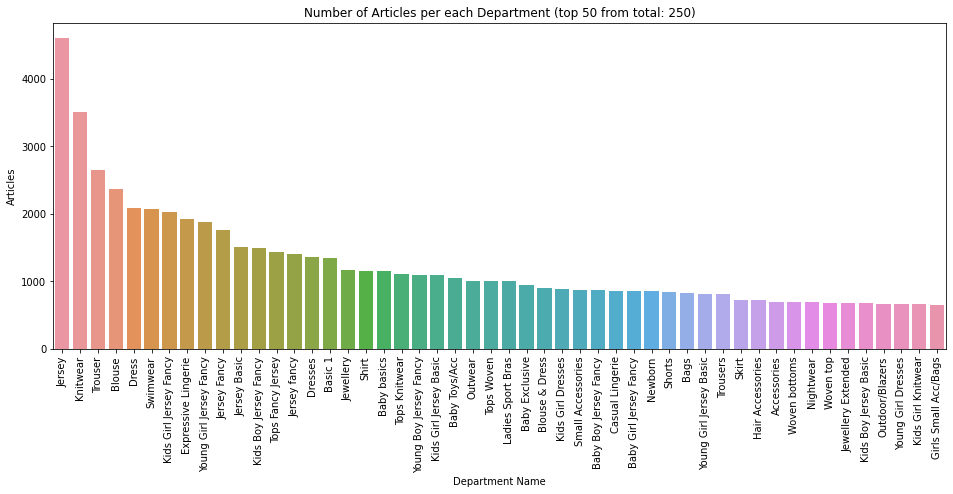

In [19]:
temp = articles_df.groupby(["department_name"])["article_id"].nunique()
df = pd.DataFrame({'Department Name': temp.index,
                   'Articles': temp.values
                  })
total_depts = len(df['Department Name'].unique())
df = df.sort_values(['Articles'], ascending=False).head(50)
plt.figure(figsize = (16,6))
plt.title(f'Number of Articles per each Department (top 50 from total: {total_depts})')
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Department Name', y="Articles", data=df)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

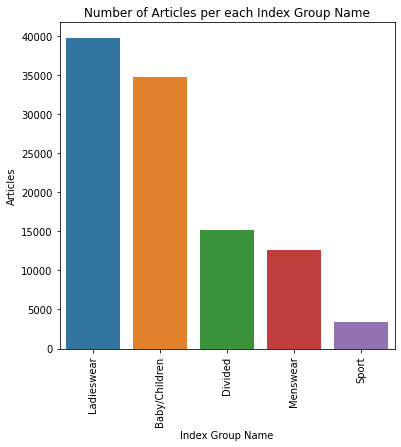

In [20]:
temp = articles_df.groupby(["index_group_name"])["article_id"].nunique()
df = pd.DataFrame({'Index Group Name': temp.index,
                   'Articles': temp.values
                  })
df = df.sort_values(['Articles'], ascending=False)
plt.figure(figsize = (6,6))
plt.title(f'Number of Articles per each Index Group Name')
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Index Group Name', y="Articles", data=df)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

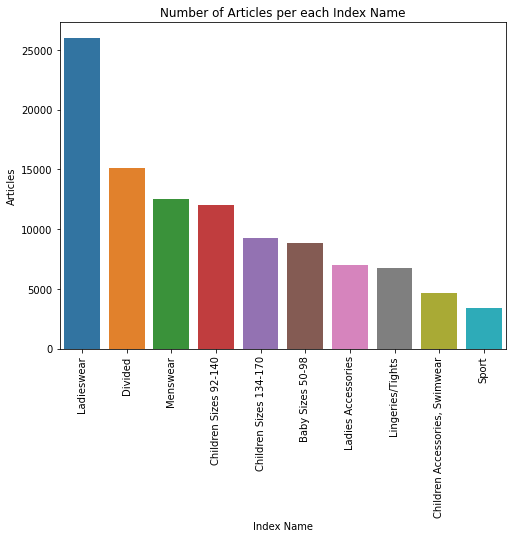

In [21]:
temp = articles_df.groupby(["index_name"])["article_id"].nunique()
df = pd.DataFrame({'Index Name': temp.index,
                   'Articles': temp.values
                  })
df = df.sort_values(['Articles'], ascending=False)
plt.figure(figsize = (8,6))
plt.title(f'Number of Articles per each Index Name')
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Index Name', y="Articles", data=df)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

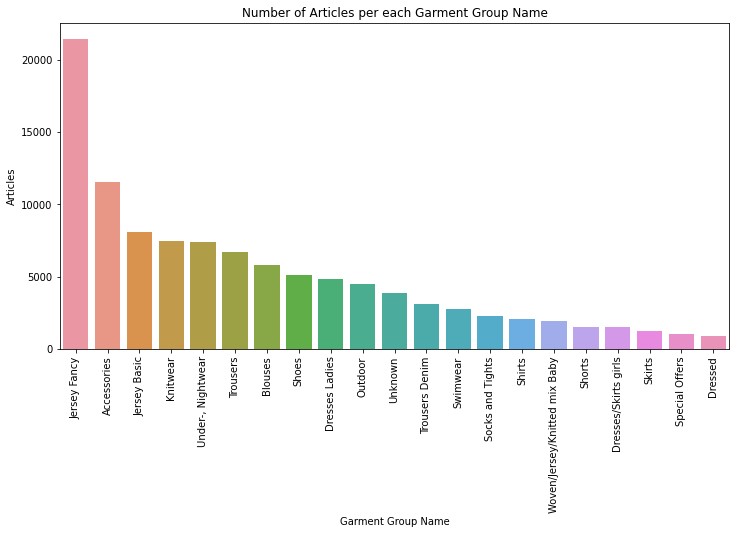

In [22]:
temp = articles_df.groupby(["garment_group_name"])["article_id"].nunique()
df = pd.DataFrame({'Garment Group Name': temp.index,
                   'Articles': temp.values
                  })
df = df.sort_values(['Articles'], ascending=False)
plt.figure(figsize = (12,6))
plt.title(f'Number of Articles per each Garment Group Name')
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Garment Group Name', y="Articles", data=df)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

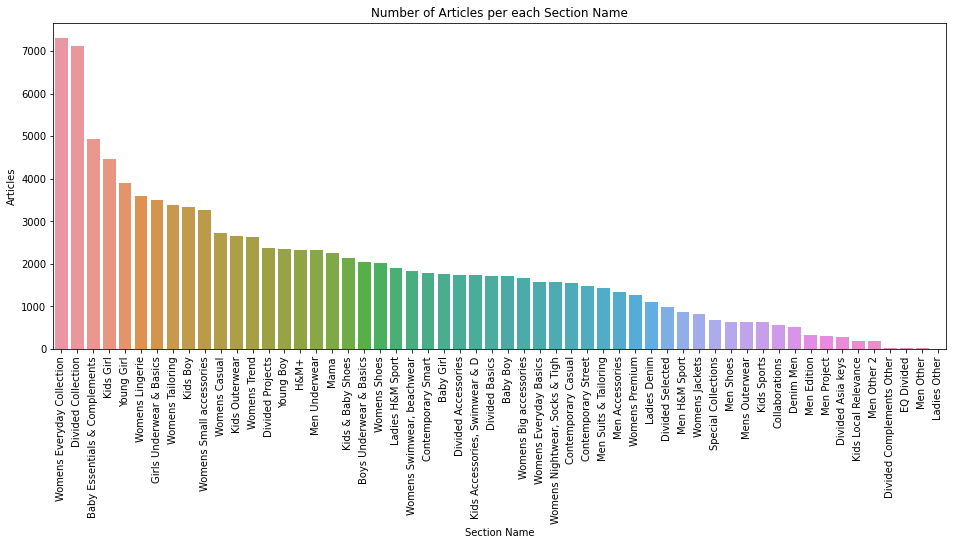

In [23]:
temp = articles_df.groupby(["section_name"])["article_id"].nunique()
df = pd.DataFrame({'Section Name': temp.index,
                   'Articles': temp.values
                  })
df = df.sort_values(['Articles'], ascending=False)
plt.figure(figsize = (16,6))
plt.title(f'Number of Articles per each Section Name')
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Section Name', y="Articles", data=df)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

In [24]:
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=5,
        random_state=1
    ).generate(str(data))

    fig = plt.figure(1, figsize=(10,10))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=14)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

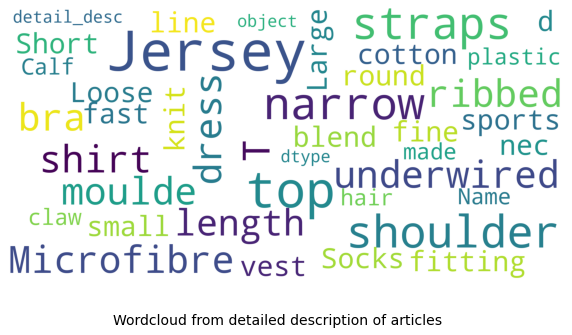

In [25]:
show_wordcloud(articles_df["detail_desc"], "Wordcloud from detailed description of articles")

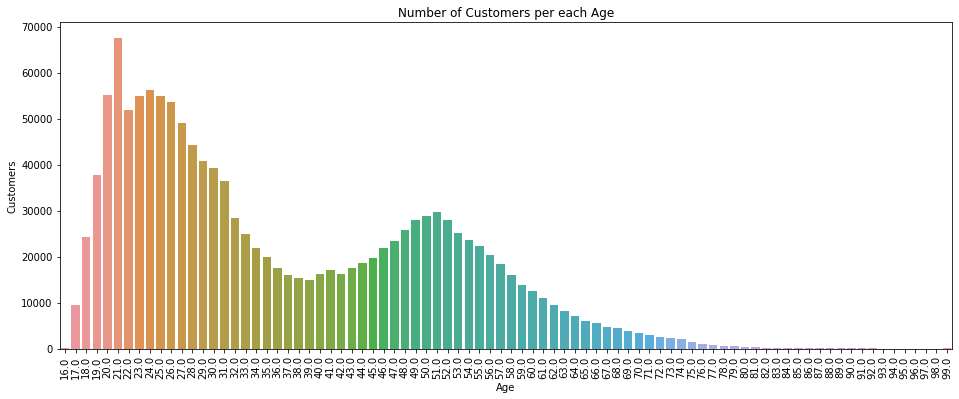

In [26]:
temp = customers_df.groupby(["age"])["customer_id"].count()
df = pd.DataFrame({'Age': temp.index,
                   'Customers': temp.values
                  })
df = df.sort_values(['Age'], ascending=False)
plt.figure(figsize = (16,6))
plt.title(f'Number of Customers per each Age')
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Age', y="Customers", data=df)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

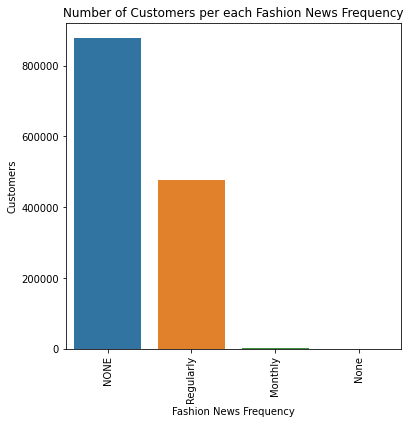

In [27]:
temp = customers_df.groupby(["fashion_news_frequency"])["customer_id"].count()
df = pd.DataFrame({'Fashion News Frequency': temp.index,
                   'Customers': temp.values
                  })
df = df.sort_values(['Customers'], ascending=False)
plt.figure(figsize = (6,6))
plt.title(f'Number of Customers per each Fashion News Frequency')
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Fashion News Frequency', y="Customers", data=df)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

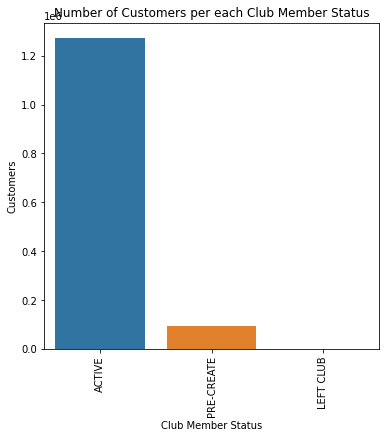

In [28]:
temp = customers_df.groupby(["club_member_status"])["customer_id"].count()
df = pd.DataFrame({'Club Member Status': temp.index,
                   'Customers': temp.values
                  })
df = df.sort_values(['Customers'], ascending=False)
plt.figure(figsize = (6,6))
plt.title(f'Number of Customers per each Club Member Status')
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Club Member Status', y="Customers", data=df)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

In [29]:
transactions_train_df.sales_channel_id.unique()

array([2, 1])

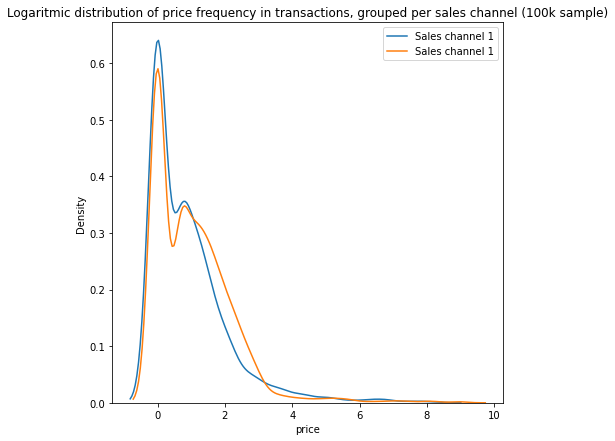

In [30]:
df = transactions_train_df.sample(100_000)
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
sns.kdeplot(np.log(df.loc[df["sales_channel_id"]==1].price.value_counts()))
sns.kdeplot(np.log(df.loc[df["sales_channel_id"]==2].price.value_counts()))
ax.legend(labels=['Sales channel 1', 'Sales channel 1'])
plt.title("Logaritmic distribution of price frequency in transactions, grouped per sales channel (100k sample)")
plt.show()

# Image data

There are 105542 articles and 105100 different images. Let's check first which articles does not have corresponding images.

The `article_id` corresponds to digits from 2nd to the last of the image name. 
The digits from 2nd to 7th of image name  correspond to product code (`product_code`). 

In [31]:
image_name_df = pd.DataFrame(images_names, columns = ["image_name"])
image_name_df["article_id"] = image_name_df["image_name"].apply(lambda x: int(x[1:]))

In [32]:
image_name_df.head()

,image_name,article_id
0,0570177001,570177001
1,0575944002,575944002
2,0576129001,576129001
3,0570806001,570806001
4,0572155001,572155001


In [33]:
image_article_df = articles_df[["article_id", "product_code", "product_group_name", "product_type_name"]].merge(image_name_df, on=["article_id"], how="left")
print(image_article_df.shape)
image_article_df.head()

(105542, 5)


,article_id,product_code,product_group_name,product_type_name,image_name
0,108775015,108775,Garment Upper body,Vest top,0108775015
1,108775044,108775,Garment Upper body,Vest top,0108775044
2,108775051,108775,Garment Upper body,Vest top,0108775051
3,110065001,110065,Underwear,Bra,0110065001
4,110065002,110065,Underwear,Bra,0110065002


Products without images.

In [34]:
article_no_image_df = image_article_df.loc[image_article_df.image_name.isna()]
print(article_no_image_df.shape)
article_no_image_df.head()

(442, 5)


,article_id,product_code,product_group_name,product_type_name,image_name
88,174057028,174057,Nightwear,Pyjama jumpsuit/playsuit,NaN
117,179208001,179208,Garment Lower body,Leggings/Tights,NaN
258,212042043,212042,Shoes,Sneakers,NaN
259,212042066,212042,Shoes,Sneakers,NaN
261,212629004,212629,Garment Full body,Dress,NaN


In [35]:
print("Product codes without images: ", article_no_image_df.product_code.nunique())
print("Product group names without images: ", list(article_no_image_df.product_group_name.unique()))

Product codes without images:  372
Product group names without images:  ['Nightwear', 'Garment Lower body', 'Shoes', 'Garment Full body', 'Accessories', 'Garment Upper body', 'Underwear', 'Socks & Tights', 'Swimwear', 'Cosmetic']


Let's visualize few images.

In [36]:
def plot_image_samples(image_article_df, product_group_name, cols=1, rows=-1):
    image_path = "/kaggle/input/h-and-m-personalized-fashion-recommendations/images/"
    _df = image_article_df.loc[image_article_df.product_group_name==product_group_name]
    article_ids = _df.article_id.values[0:cols*rows]
    plt.figure(figsize=(2 + 3 * cols, 2 + 4 * rows))
    for i in range(cols * rows):
        article_id = ("0" + str(article_ids[i]))[-10:]
        plt.subplot(rows, cols, i + 1)
        plt.axis('off')
        plt.title(f"{product_group_name} {article_id[:3]}\n{article_id}.jpg")
        image = Image.open(f"{image_path}{article_id[:3]}/{article_id}.jpg")
        plt.imshow(image)

Let's choose from some product group name.

In [37]:
print(image_article_df.product_group_name.unique())

['Garment Upper body' 'Underwear' 'Socks & Tights' 'Garment Lower body'
 'Accessories' 'Items' 'Nightwear' 'Unknown' 'Underwear/nightwear' 'Shoes'
 'Swimwear' 'Garment Full body' 'Cosmetic' 'Interior textile' 'Bags'
 'Furniture' 'Garment and Shoe care' 'Fun' 'Stationery']


We will represent images grouped on product group name.

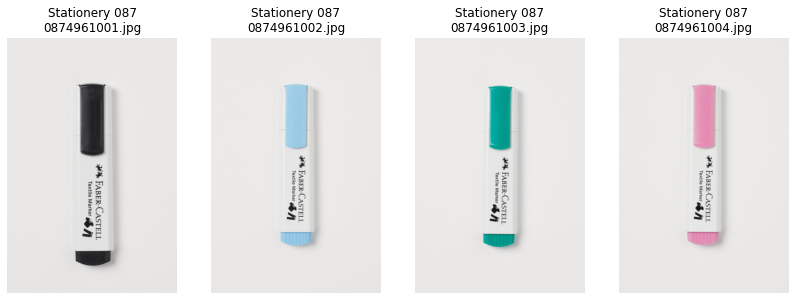

In [38]:
plot_image_samples(image_article_df, "Stationery", 4, 1)

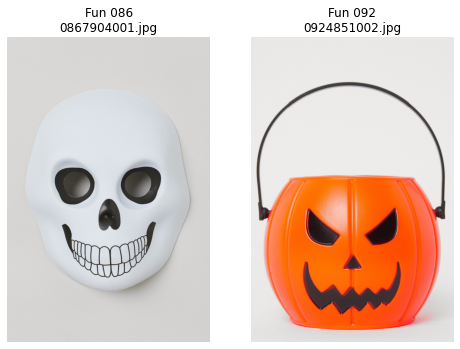

In [39]:
plot_image_samples(image_article_df, "Fun", 2, 1)

# Model 1

In [40]:

from pathlib import Path

data_path = Path('/kaggle/input/h-and-m-personalized-fashion-recommendations/')
df = pd.read_csv(
    data_path / 'transactions_train.csv',
    # set dtype or pandas will drop the leading '0' and convert to int
    dtype={'article_id': str} 
)


In [41]:
print(df.shape)
df.head()

(31788324, 5)


,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,0505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,0685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,0685687004,0.016932,2


In [42]:
df['t_dat'] = pd.to_datetime(df['t_dat'])

In [43]:
df_3_week = df[df['t_dat'] >= pd.to_datetime('2020-08-31')].copy()
df_2_week = df[df['t_dat'] >= pd.to_datetime('2020-09-07')].copy()
df_1_week = df[df['t_dat'] >= pd.to_datetime('2020-09-15')].copy()

In [44]:
purchase_dict_3_week= {}

for i,x in enumerate(zip(df_3_week['customer_id'], df_3_week['article_id'])):
    cust_id, art_id = x
    if cust_id not in purchase_dict_3_week:
        purchase_dict_3_week[cust_id] = {}
    
    if art_id not in purchase_dict_3_week[cust_id]:
        purchase_dict_3_week[cust_id][art_id] = 0
    
    purchase_dict_3_week[cust_id][art_id] += 1
    
print(len(purchase_dict_3_week))

dummy_list_3_week = list((df_3_week['article_id'].value_counts()).index)[:12]

196319


In [45]:
purchase_dict_2_week= {}

for i,x in enumerate(zip(df_2_week['customer_id'], df_2_week['article_id'])):
    cust_id, art_id = x
    if cust_id not in purchase_dict_2_week:
        purchase_dict_2_week[cust_id] = {}
    
    if art_id not in purchase_dict_2_week[cust_id]:
        purchase_dict_2_week[cust_id][art_id] = 0
    
    purchase_dict_2_week[cust_id][art_id] += 1
    
print(len(purchase_dict_2_week))

dummy_list_2_week = list((df_2_week['article_id'].value_counts()).index)[:12]

143455


In [46]:
purchase_dict_1_week= {}

for i,x in enumerate(zip(df_1_week['customer_id'], df_1_week['article_id'])):
    cust_id, art_id = x
    if cust_id not in purchase_dict_1_week:
        purchase_dict_1_week[cust_id] = {}
    
    if art_id not in purchase_dict_1_week[cust_id]:
        purchase_dict_1_week[cust_id][art_id] = 0
    
    purchase_dict_1_week[cust_id][art_id] += 1
    
print(len(purchase_dict_1_week))

dummy_list_1_week = list((df_1_week['article_id'].value_counts()).index)[:12]

75481


In [47]:
print(sample_submission_df.shape)
sample_submission_df.head()

(1371980, 2)


,customer_id,prediction
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0706016001 0706016002 0372860001 0610776002 07...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0706016001 0706016002 0372860001 0610776002 07...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0706016001 0706016002 0372860001 0610776002 07...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0706016001 0706016002 0372860001 0610776002 07...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,0706016001 0706016002 0372860001 0610776002 07...


In [48]:
need_improvemnet_model = sample_submission_df[['customer_id']]
prediction_list = []

dummy_list = list((df_2_week['article_id'].value_counts()).index)[:12]
dummy_pred = ' '.join(dummy_list)

for i, cust_id in enumerate(sample_submission_df['customer_id'].values.reshape((-1,))):
    if cust_id in purchase_dict_1_week:
        l = sorted((purchase_dict_1_week[cust_id]).items(), key=lambda x: x[1], reverse=True)
        l = [y[0] for y in l]
        if len(l)>12:
            s = ' '.join(l[:12])
        else:
            s = ' '.join(l+dummy_list_1_week[:(12-len(l))])
    elif cust_id in purchase_dict_2_week:
        l = sorted((purchase_dict_2_week[cust_id]).items(), key=lambda x: x[1], reverse=True)
        l = [y[0] for y in l]
        if len(l)>12:
            s = ' '.join(l[:12])
        else:
            s = ' '.join(l+dummy_list_2_week[:(12-len(l))])
    elif cust_id in purchase_dict_3_week:
        l = sorted((purchase_dict_3_week[cust_id]).items(), key=lambda x: x[1], reverse=True)
        l = [y[0] for y in l]
        if len(l)>12:
            s = ' '.join(l[:12])
        else:
            s = ' '.join(l+dummy_list_3_week[:(12-len(l))])
    else:
        s = dummy_pred
    prediction_list.append(s)

need_improvemnet_model['prediction'] = prediction_list
print(need_improvemnet_model.shape)
need_improvemnet_model.head()


(1371980, 2)


,customer_id,prediction
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0568601043 0751471001 0909370001 0915526001 09...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0909370001 0924243001 0918522001 0448509014 07...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0794321007 0924243001 0924243002 0923758001 09...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0909370001 0924243001 0918522001 0448509014 07...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,0909370001 0924243001 0918522001 0448509014 07...


In [49]:
need_improvemnet_model.to_csv('submission.csv', index=False)

# Model 2